---
### **Projeto 1: “Churn” de clientes em uma empresa de telecomunicações**
Ciência de Dados e Inteligência Artificial - PUC-SP

Pontifícia Universidade Católica de São Paulo 
> *Marina Rodrigues - RA 00274375*

---
## **Sumário**
#### **1. Introdução**
#### **2. Pré-processamento**
> ##### 2.1 Importação de bibliotecas
> ##### 2.2 Importação do dataset
> ##### 2.3 Limpeza dos dados
> ##### 2.4 Definição das Features e do Target
#### **3. Modelo de Árvore de Decisão**
> ##### 3.1 Criação do modelo
> ##### 3.2 Segmentação dos dados e treinamento do modelo
#### **4. Validação do modelo**
> ##### 4.1 Importância da feature
> ##### 4.2 Acurácia e precisão
> ##### 4.3 Matriz de  confusão


---
#### **1. Introdução**


Muitos clientes migram entre operadoras de telecomunicações devido a fatores diversos, sendo essa  prática conhecida  como “Churn”.  Com  uma  análise  do banco  de  dados  dos  clientes  é possível  desenvolver  um  modelo  de  aprendizagem  de  máquina  que  seja  capaz de  prever  os clientes  que  são  mais  propensos amigrar  de  operadora  e  assim oferece-los  promoções diferenciadas visando retê-los.

Uma empresa de telecomunicações está preocupada com o número de clientes que trocam seus negócios de telefonia fixa por concorrentes a cabo. Eles precisam entender quem está saindo.

---
#### **2. Pré-processamento**


##### **2.1 Importação de bibliotecas**


In [265]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

##### **2.2 Importação do dataset**


A organização do dataset é feita seguindo as seguintes colunas:

* Clientes que saíram no último mês: a coluna é chamada Churn, esse é o valor a ser previsto no modelo.

* Serviços para os quais cada cliente se inscreveu: telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico, streaming de TV e filmes.

* Informações da conta do cliente: há quanto tempo eles são clientes (tenure), contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais.

* Informações demográficas sobre clientes: sexo, faixa etária e se têm parceiros e dependentes.

In [266]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 rows x 21 columns]

##### **2.3 Limpeza dos dados**

Abaixo está a informação dos dados do dataframe, como o tipo de dado em  cada coluna.

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


A maioria dos dados presentes no dataset são do tipo "object", ou seja, categóricos. Para a implementação do modelo, os dados categóricos foram transformados em fatores (dados numéricos) por meio do método factorize().

In [268]:
df['customerID'], customerID = df['customerID'].factorize()
df['gender'], gender = df['gender'].factorize()
df['Partner'], Partner = df['Partner'].factorize()
df['Dependents'], Dependents = df['Dependents'].factorize()
df['PhoneService'], PhoneService = df['PhoneService'].factorize()
df['MultipleLines'], MultipleLines = df['MultipleLines'].factorize()
df['InternetService'], InternetService = df['InternetService'].factorize()
df['OnlineSecurity'], OnlineSecurity = df['OnlineSecurity'].factorize()
df['OnlineBackup'], OnlineBackup = df['OnlineBackup'].factorize()
df['DeviceProtection'], DeviceProtection = df['DeviceProtection'].factorize()
df['TechSupport'], TechSupport = df['TechSupport'].factorize()
df['StreamingTV'], StreamingTV = df['StreamingTV'].factorize()
df['StreamingMovies'], StreamingMovies = df['StreamingMovies'].factorize()
df['Contract'], Contract = df['Contract'].factorize()
df['PaperlessBilling'], PaperlessBilling = df['PaperlessBilling'].factorize()
df['PaymentMethod'], PaymentMethod = df['PaymentMethod'].factorize()
df['MonthlyCharges'], MonthlyCharges = df['MonthlyCharges'].factorize()
df['TotalCharges'], TotalCharges = df['TotalCharges'].factorize()

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   int64 
 1   gender            7043 non-null   int64 
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   int64 
 4   Dependents        7043 non-null   int64 
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   int64 
 7   MultipleLines     7043 non-null   int64 
 8   InternetService   7043 non-null   int64 
 9   OnlineSecurity    7043 non-null   int64 
 10  OnlineBackup      7043 non-null   int64 
 11  DeviceProtection  7043 non-null   int64 
 12  TechSupport       7043 non-null   int64 
 13  StreamingTV       7043 non-null   int64 
 14  StreamingMovies   7043 non-null   int64 
 15  Contract          7043 non-null   int64 
 16  PaperlessBilling  7043 non-null   int64 
 17  PaymentMethod 

##### **2.4 Definição das Features e do Target**

Foram definidas as Features do modelo, que são todas as colunas do dataset menos a coluna Churn, que é o Target.

In [270]:
features = ['customerID','gender','SeniorCitizen','Partner',
            'Dependents','tenure','PhoneService','MultipleLines',
            'InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV',
            'StreamingMovies','Contract','PaperlessBilling',
            'PaymentMethod','MonthlyCharges','TotalCharges']
x = df[features]

In [271]:
y = df.Churn
np.unique(y)

array(['No', 'Yes'], dtype=object)

---
#### **3. Modelo de Árvore de Decisão**

##### **3.1 Criação do modelo**

O modelo foi criado e inicialmente treinado com a integridade dos dados para demonstrar na figura a árvore de decisão.

In [272]:
dtm = DecisionTreeClassifier(criterion='entropy')
dtm = dtm.fit(x,y)

In [289]:
plt.figure(figsize=(300,80))
tree.plot_tree(dtm, feature_names = x.columns, 
               class_names = np.unique(y), filled=True, fontsize=7)
plt.savefig('arvore.png', dpi=200)
plt.show()

##### **3.2 Segmentação dos dados e treinamento do modelo**

O dataset foi dividido entre os dados de treinamento (80%) e os dados de teste (20%).

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [277]:
x_train.head()

customerID  gender  ...  MonthlyCharges  TotalCharges
1814        1814       1  ...             139          1769
5946        5946       0  ...             145          5551
3881        3881       1  ...             715          3705
2389        2389       1  ...             324          2322
3676        3676       1  ...             213          3522

[5 rows x 20 columns]

In [278]:
y_train.head()

1814     No
5946    Yes
3881     No
2389     No
3676     No
Name: Churn, dtype: object

Treinamento do modelo:

In [279]:
dtm = dtm.fit(x_train, y_train)
dtm

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

---
#### **4. Validação do modelo**

##### **4.1 Importância da feature**

O gráfico abaixo mostra a importância de cada feature na decisão do modelo. As features mais importante são:

1. Total Charges
2. Monthly Charges
3. Payment Method
4. Paperless Billing
5. Contract



Text(0.5, 0, 'Importância da feature')

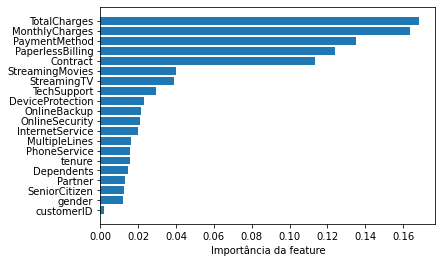

In [280]:
new_features = dtm.feature_importances_.argsort()
plt.barh(features, dtm.feature_importances_[new_features])
plt.xlabel("Importância da feature")

##### **4.2 Acurácia e precisão**

Foi realizado o cálculo da acurácia e da precisão do modelo.

In [281]:
y_pred = dtm.predict(x_test)
y_score = dtm.score(x_test, y_test)
print('Acurácia: ', y_score)

Acurácia:  0.7154009936124911


In [282]:
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Precisão micro média: {0:0.2f}'.format(micro_precision))

Precisão micro média: 0.72


##### **4.3 Matriz de confusão**

A matriz de confusão abaixo demonstra as classificações incorretas. 

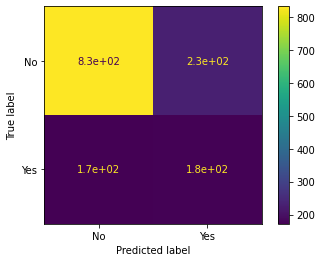

In [283]:
plot_confusion_matrix(dtm, x_test, y_test)